# **DATASET 3 : BLACK FRIDAY**

**DEPENDENCIES**

Disini akan diolah dataset ketiga mengenai jumlah medali yang pernah diterima semua atlet dari 1800an hingga 2018. Pertama akan dilakukan import bagi semua library yang digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

**MEMASUKKAN DATA DARI CSV KE DATAFRAME**

Kemudian akan dibuat dataframe dari file csv. Dataframe akan disimpan dalam variabel df

In [2]:
df = pd.read_csv('dataset/black_friday.csv')

# **VISUALISASI DATA**

   **1. HISTOGRAM**

Untuk membuat histogram, dapat menggunakan method milik Dataframe yang bernama hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19e9caf908>]],
      dtype=object)

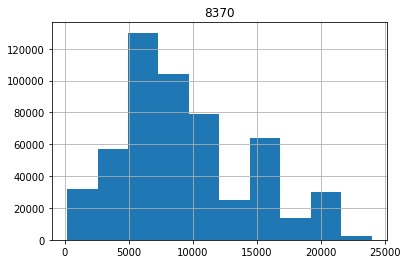

In [3]:
df.hist()

**2. BOXPLOT**

Untuk membuat boxplot, dapat pula menggunakan method milik dataframe yang bernama boxplot()

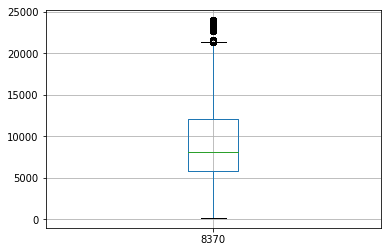

In [4]:
df.boxplot()

# **DESKRIPSI DATA**

**1. NILAI MINIMUM**

untuk mencari nilai minimum, dapat menggunakan method dari series yang bernama min(). Series adalah irisan dataframe yang merupakan satu array data. Didapat nilai minimum pada data adalah 185

In [5]:
df['8370'].min()

185

**2. NILAI MAKSIMUM**

untuk mencari nilai maksimum, dapat menggunakan method dari series yang bernama max(). Didapat nilai minimum pada data adalah 23961

In [6]:
df['8370'].max()

23961

**3. NILAI RATA RATA**

untuk mencari nilai rata-rata, dapat menggunakan method dari series yang bernama mean(). Didapat mean data adalah 9333.861646

In [7]:
df['8370'].mean()

9333.861645609179

**4. NILAI MODUS**

untuk mencari modus, dapat menggunakan method dari series yang bernama mode(). Method ini akan menghasilkan lebih dari satu nilai modus bila jumlah kemunculan modus-modus tersebut sama. Sehingga defaultnya mode() akan menghasilkan sebuah array. Didapat modus data hanya ada 1, yakni 6855

In [8]:
df['8370'].mode()[0]

6855

**5. NILAI MEDIAN**

Untuk mencari median, dapat digunakan method dari series bernama median(). Didapat median data adalah 8062

In [9]:
df['8370'].median()

8062.0

**6. NILAI VARIANSI**

Untuk mencari variansi, dapat digunakan method dari series bernama var(). Didapat variansi adalah 2.48 * 10^7

In [10]:
df['8370'].var()

24810625.910612945

**7. NILAI SIMPANGAN BAKU**

Untuk mencari simpangan baku, dapat menggunakan method milik Series bernama std(). Didapat simpangan baku adalah 4981.026592

In [11]:
df['8370'].std()

4981.026592040334

**8. NILAI SKEWNESS**

Untuk mencari nilai skewness, dapat digunakan method milik Series bernama skew(). Didapat nilai skewness sebesar 0.62478

In [12]:
df['8370'].skew()

0.6242781497876939

**9. NILAI KURTOSIS**

Untuk mencari nilai kurtosis, dapat menggunakan method Series bernama kurtosis(). Didapat nilai kurtosis sebesar -0.343127

In [13]:
df['8370'].kurtosis()

-0.343126846253909

# **DISTRIBUSI DATA**

**Distribusi yang dipilih: Poisson**

Alasan: Berdasarkan penjelasan pada spek tubes, data ini merupakan data dengan distribusi diskrit mengenai jumlah spending masyarakat pada suatu hari (Black Friday).Dapat dilihat bahwa distribusi poisson merupakan distribusi diskrit yang menjelaskan banyaknya kejadian di satu unit waktu atau tempat. Dapat dianalogikan bahwa banyaknya spending seseorang sebagai banyaknya suatu kejadian, sedangkan selang waktunya adalah satu hari (yakni di black friday itu sendiri). Selain itu, pemilihan distribusi poisson juga karena semua distribusi diskrit lain melibatkan adanya sukses dan gagal pada sejumlah percobaan, sedangkan data ini samasekali tidak melibatkan percobaaan yang mempunyai hasil gagal/sukses. 

Parameter lambda yang akan dipakai untuk distribusi ini adalah rata rata uang yang dihabiskan pada Black Friday.

**Pembuktian menggunakan Goodness of Fit Test**

Akan dilakukan goodness of fit antara data (observed values) dengan distribusi poisson (expected values). Pertama, semua data akan dibagi dengan 1000 karena distribusi poisson *value* nya berkisar di daerah satuan

In [14]:
data = df.divide(1000)
data.head()

8370
0  15.200
1   1.422
2   1.057
3   7.969
4  15.227

Dibawah ini, variable:
- props menyimpan probabilitas menemukan suatu value total pembelian di data yang dipunya (value pembelian yang 
  dipunya akan di round ke integer terdekat, karena distribusi poisson hanya menerima parameter integer) 
- mean menyimpan rata-rata pembelian dari data yang dipunya
- poi_prob menyimpan probabilitas kemunculan value pembelian (yang sudah di-round) berdasarkan distribusi poisson

Didapat bahwa jumlah probs yang diproses ada 25, sehingga *degree of freedom=24*

In [15]:
probs = data['8370'].round().value_counts().divide(df.shape[0])
mean = data['8370'].mean()

print(probs.head())

poi_prob = []  
for i in probs.index: poi_prob.append(st.poisson.pmf(i, mean))

8.0     0.126373
7.0     0.104422
5.0     0.087004
16.0    0.070548
10.0    0.069317
Name: 8370, dtype: float64


Menghitung hasil *hypothesis testing* data observasi (data yang dipunya) dengan value ekspektasi (value di poisson) menggunakan chi-squared

In [16]:
import scipy
observed = scipy.array(probs.values)
expected = scipy.array(poi_prob)

st.chisquare(observed, f_exp=expected).statistic

3.1111112072826477

Didapat hasil perhitungan chi-squared adalah 3.11, karena kurang dari critical value (untuk dof=24 dan confidence level 5%) yang bernilai 13.9, maka **hipotesis diterima untuk menggunakan distribusi poisson**

# **PERTANYAAN**

Pertama, didefinisikan dulu variabel-variabel yang akan sering digunakan dalam perhitungan nanti.
1. dfx merupakan array data yang semua nilainya dibagi 1000. Nilai-nilai inilah yang akan dipakai, karena akan digunakan distribusi poisson, yang mana nilainya banyak yang berada dalam rentang satuan. Sehingga sumbu x pada distribusi poisson akan merepresentasikan jumlah *spending* seseorang dalam ribuan dolar.

2. mean akan menyimpan nilai mean dari array data

3. stdev akan menyimpan nilai simpangan baku dari array data

In [17]:
dfx = df.divide(1000)
mean = dfx.mean()
stdev = dfx.std()

Selanjutnya, akan didefiniskan fungsi untuk menghitung luas kurva (Cumulative Density Function) bagi distribusi poisson. Perhitungan ini menggunakan function method yang ada pada objek poisson yang didapat dari library *scipy*. Parameter fungsinya adalah (secara berururtan), x sebagai nilai variabel random, mean yakni rata-rata data, dan loc yaitu pergeseran distribusi poisson (loc bernilai 0 pada kasus ini). 

CDF pada X=x didefinisikan sebagai luas area kurva pada rentang [-inf, x]

In [18]:
def find_area(x):
    return st.poisson.cdf(x,mean)

**Pertanyaan 1:**

In [19]:
a1 = find_area(1)
print(a1)
print('Jumlah orang dengan pembelian < 1000 =', a1*250)

[0.00091331]
Jumlah orang dengan pembelian < 1000 = [0.22832741]


In [20]:
a2 = 1 - find_area(10)
print(a2)
print('Jumlah orang dengan pembelian > 10000 =', a2*250)

[0.334253]
Jumlah orang dengan pembelian > 10000 = [83.56325053]


In [21]:
a3 = 1 - find_area(20)
print(a3)
print('Jumlah orang dengan pembelian > 20000 =', a3*250)

[0.00069224]
Jumlah orang dengan pembelian > 20000 = [0.17306071]


**Pertanyaan 2:** 

In [22]:
a4 = find_area(2) - find_area(1.98)
print(a4)
print('Jumlah orang yang membeli di range 1980-2000 =', a4*1000)

[0.00384989]
Jumlah orang yang membeli di range 1980-2000 = [3.84988817]


In [23]:
a4 = find_area(2.987) - find_area(2.707)
print(a4)
print('Jumlah orang yang membeli di range 2707–2897 =', a4*1000)

[0.]
Jumlah orang yang membeli di range 2707–2897 = [0.]


Pada soal terakhir hasilnya sangat kecil sehingga tidak bisa ditampilkan, sehingga dibulatkan oleh python menjadi 0.

# **DATASET 5 : ATHLETES**

**DEPENDENCIES**

Disini akan diolah dataset ketiga mengenai jumlah medali yang pernah diterima semua atlet dari 1800an hingga 2018. Pertama akan dilakukan import bagi semua library yang digunakan

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**MEMASUKKAN DATA DARI CSV KE DATAFRAME**

Kemudian akan dibuat dataframe dari file csv. Dataframe akan disimpan dalam variabel df

In [25]:
dataframe = pd.read_csv('dataset/athletes.csv')
df = dataframe.filter(['Medal'])

# **VISUALISASI DATA**

   **1. HISTOGRAM**

Untuk membuat histogram, dapat menggunakan method milik Dataframe yang bernama hist()

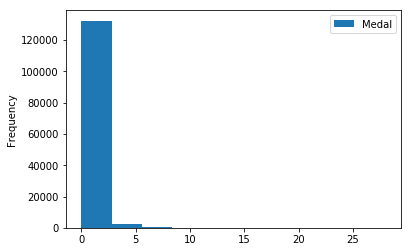

In [26]:
df.plot.hist()

**2. BOXPLOT**

Untuk membuat boxplot, dapat pula menggunakan method milik dataframe yang bernama boxplot()

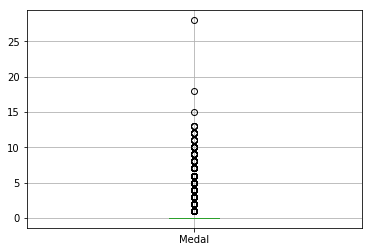

In [27]:
df.boxplot()

# **DESKRIPSI DATA**

**1. NILAI MINIMUM**

untuk mencari nilai minimum, dapat menggunakan method dari series yang bernama min(). Series adalah irisan dataframe yang merupakan satu array data. Didapat nilai minimum pada data adalah 0

In [28]:
df.min()

Medal    0
dtype: int64

**2. NILAI MAKSIMUM**

untuk mencari nilai maksimum, dapat menggunakan method dari series yang bernama max(). Didapat nilai minimum pada data adalah 28

In [29]:
df.max()

Medal    28
dtype: int64

**3. NILAI RATA RATA**

untuk mencari nilai rata-rata, dapat menggunakan method dari series yang bernama mean(). Didapat mean data adalah 9333.861646

In [30]:
df.mean()

Medal    0.295277
dtype: float64

**4. NILAI MODUS**

untuk mencari modus, dapat menggunakan method dari series yang bernama mode(). Method ini akan menghasilkan lebih dari satu nilai modus bila jumlah kemunculan modus-modus tersebut sama. Sehingga defaultnya mode() akan menghasilkan sebuah array. Didapat modus data hanya ada 1, yakni 0

In [31]:
df.mode()

Medal
0      0

**5. NILAI MEDIAN**

Untuk mencari median, dapat digunakan method dari series bernama median(). Didapat median data adalah 8062

In [32]:
df.median()

Medal    0.0
dtype: float64

**6. NILAI VARIANSI**

Untuk mencari variansi, dapat digunakan method dari series bernama var(). Didapat variansi adalah 2.48 * 10^7

In [33]:
df.var()

Medal    0.525213
dtype: float64

**7. NILAI SIMPANGAN BAKU**

Untuk mencari simpangan baku, dapat menggunakan method milik Series bernama std(). Didapat simpangan baku adalah 4981.026592

In [34]:
df.std()

Medal    0.724716
dtype: float64

**8. NILAI SKEWNESS**

Untuk mencari nilai skewness, dapat digunakan method milik Series bernama skew(). Didapat nilai skewness sebesar 0.62478

In [35]:
df.skew()

Medal    4.819999
dtype: float64

**9. NILAI KURTOSIS**

Untuk mencari nilai kurtosis, dapat menggunakan method Series bernama kurtosis(). Didapat nilai kurtosis sebesar -0.343127

In [36]:
df.kurtosis()

Medal    51.562526
dtype: float64

# **DISTRIBUSI DATA**

untuk mencari distribusi data yang paling tepat, digunakan library scipy untuk mencocokkan berbagai distribusi ke data, kemudian dicari distribusi yang paling mendekati data.

In [37]:
import scipy.stats as st
import warnings

Dibawah ini adalah algoritma untuk mencocokkan berbagai distribusi. Pertama, dituliskan dulu berbagai distribusi yang akan dicocokkan. Yang dipakai adalah yang diajarkan di kelas dan terdapat pada buku, yakni 
1. norm (distribusi normal)
2. gamma (distribusi gamma)
3. expon (distribusi eksponensial)
4. chi (distribusi chi-squared)
5. beta (distribusi beta)
6. lognorm (distribusi lognormal)

Cara kerjanya adalah, untuk setiap distribusi diatas, akan dipanggil method milik object distribusi tersebut yang bernama fit(), yang fungsinya adalah untuk mencari parameter distribusi yang paling mendekati data kita. 

Setelah didapat parameter yang paling sesuai, akan dihitung selisih antara nilai probabilitas pada distribusi dengan yang ada pada data kita, untuk setiap nilai data yang bersangkutan. Nilai tersebut dikuadratkan, dan disimpan dalam variable sse.

Untuk setiap jenis distribusi, kita akan menghitung sse-nya, dan distribusi yang kita pilih adalah yang memiliki sse terkecil.

In [38]:
dists = [st.norm, st.gamma, st.expon, """st.chi, st.beta, st.lognorm"""]

y, x = np.histogram(df, bins=200, density=True)
x = (x + np.roll(x, -1))[:-1] / 2.0

distribution = st.norm
params = (0.0, 1.0)
best_sse = np.inf

for dist in dists:
    
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings('ignore')
            par = dist.fit(df)

            arg = par[:-2]
            loc = par[-2]
            scale = par[-1]

            pdf = dist.pdf(x, loc=loc, scale=scale, *arg)
            sse = np.sum(np.power(y - pdf, 2.0))

             # identify if this distribution is better
            if (best_sse > sse) & (sse > 0):
                distribution = dist
                params = par
                best_sse = sse

    except Exception:
        pass
        
print(distribution.name)
print(params)


expon
(0.0, 0.2952772561622789)


Didapat bahwa yang paling cocok adalah distribusi eksponensial, dengan sse terkecil.

# **PERTANYAAN**

Pertama, didefinisikan dulu variabel-variabel yang akan sering digunakan dalam perhitungan nanti

1. mean akan menyimpan nilai mean dari array data

2. stdev akan menyimpan nilai simpangan baku dari array data

3. loc adalah pergeseran distribusi eksponensial (loc bernilai 0 pada kasus ini).  

4. scale adalah nilai 1/(lambda) pada distribusi eksponensial

In [39]:
mean = df.mean()
stdev = df.std()
loc, scale = st.expon.fit(df)

Selanjutnya, didefinsikan beberapa fungsi

1. find_area adalah fungsi untuk mencari luas kurva distribusi eksponensial pada rentang [-infinity, x]

2. find_prob adalah fungsi untuk mencari probabilitas bagi nilai X=x tertentu

In [40]:
def find_area(x):
    return st.expon.cdf(x, loc, 1/scale)

def find_prob(x):
    return st.expon.pdf(x, loc, 1/scale)

**Pertanyaan 1:**

a. peluang seseorang meraih 0 medali

In [41]:
prob1 = find_prob(0)
print(prob1)

0.2952772561622789


b. peluang seseorang meraih lebih dari 10 medali

In [42]:
prob2 = 1 - find_area(10)
print(prob2)

0.052194791872804736


c. peluang seseorang meraih 3 medali

In [43]:
prob3 = find_prob(3)
print(prob3)

0.12176378725190931


d. peluang seseorang meraih 1 atau 5 medali

In [44]:
prob4 = find_prob(1)
prob5 = find_prob(5)
print(prob4 + prob5)

0.28724187185682887


**Pertanyaan 2:** Confidence interval 95%.

Dijawab menggunakan method milik object expon dari library scipy, bernama interval(). Method mengambil argumen x(luas area), loc(dijelaskan diatas), dan scale(dijelaskan diatas), dan akan mengembalikan dua batas pada kurva exponensial yang luas antara keduanya bernilai x. 

Pada perhitungan dibawah, batas bawah disimpan di variabel low, batas atas pada variabel high

In [45]:
low, high = st.expon.interval(0.95, loc, scale)
print("Low (Batas bawah medali diterima) =", low, '\n', "High (Batas atas medali diterima) =", high)

Low (Batas bawah medali diterima) = 0.007475772873644558 
 High (Batas atas medali diterima) = 1.089242203524168
